In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler 


import warnings 
warnings.filterwarnings("ignore") 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Training.csv')

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
data=data.drop('Unnamed: 133',axis=1)

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
unique_disease=data['prognosis'].unique()

In [ ]:
unique_disease 

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
data.describe(include="all") 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malaria
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.046341,0.209756,...,0.023171,0.023171,0.047561,0.096341,0.096341,0.023171,0.047561,0.023171,0.048780,0.021951,0.021951,0.024390,0.024390,0.046341,0.023171,0.024390,0.023171,0.023171,0.024390,0.024390,0.024390,0.024390,0.023171,0.023171,0.023171,0.024390,0.023171,0.024390,0.046341,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,0.146539,0.487578,0.

In [ ]:
data.shape

(4920, 133)

In [ ]:
data.isnull().sum().sum()

0

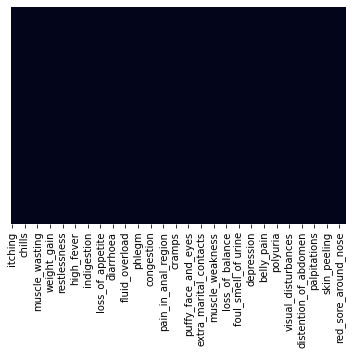

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
data.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,-0.059893,-0.057763,0.207896,0.350585,0.069744,-0.061573,-0.061573,-0.061573,-0.088129,0.091830,-0.088129,0.311436,-0.059893,-0.061573,-0.143855,0.037309,-0.059893,-0.126848,-0.159830,-0.059893,-0.086906,-0.067585,0.300936,0.253240,-0.069644,0.230103,-0.063212,-0.088129,-0.088129,0.263282,...,-0.061573,-0.061573,-0.061573,-0.089338,-0.130537,-0.130537,-0.061573,0.226497,-0.061573,-0.090534,0.326439,-0.059893,-0.063212,-0.063212,-0.088129,-0.061573,-0.063212,-0.061573,-0.061573,0.372559,0.372559,-0.063212,-0.063212,-0.061573,-0.061573,-0.061573,-0.063212,-0.061573,-0.063212,-0.088129,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,-0.065324,-0.225046,0.166507,0.298143,-0.105248,-0.067156,-0.067156,-0.067156,-0.096120,-0.139363,-0.096120,0.067246,-0.065324,-0.067156,-0.156900,0.117059,-0.065324,-0.138350,-0.174323,-0.065324,-0.094786,0.053792,-0.207998,-0.157841,-0.090663,0.049731,0.341036,0.204714,-0.096120,-0.224648,...,-0.067156,-0.067156,-0.067156,-0.097439,-0.142374,0.060683,-0.067156,0.481206,-0.067156,-0.098744,0.298143,-0.065324,-0.068944,-0.068944,-0.096120,-0.067156,-0.068944,-0.067156,-0.067156,-0.068944,-0.068944,-0.068944,-0.068944,-0.067156,-0.067156,-0.067156,-0.068944,-0.067156,-0.068944,-0.096120,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,-0.022444,-0.119543,-0.032103,-0.022444,-0.120465,-0.023073,-0.023073,-0.023073,-0.033025,-0.047882,-0.033025,-0.047882,-0.022444,-0.023073,-0.053907,-0.092690,-0.022444,-0.047534,-0.059893,-0.022444,-0.032566,-0.081991,-0.071463,-0.054230,-0.082554,-0.082836,-0.023687,-0.033025,-0.033025,-0.077184,...,-0.023073,-0.023073,-0.023073,-0.033478,-0.048916,-0.048916,-0.023073,-0.033478,-0.023073,-0.033926,0.886395,-0.022444,-0.023687,-0.023687,-0.033025,-0.023073,-0.023687,-0.023073,-0.023073,-0.023687,-0.023687,-0.023687,-0.023687,-0.023073,-0.023073,-0.023073,-0.023687,-0.023073,-0.023687,-0.033025,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,-0.032566,-0.173459,-0.046581,-0.032566,0.041755,-0.033480,-0.033480,-0.033480,-0.047919,-0.069477,-0.047919,-0.069477,-0.032566,-0.033480,0.253730,0.101860,-0.032566,-0.068972,-0.086906,-0.032566,-0.047254,0.132137,-0.103694,-0.078689,-0.119787,-0.120196,-0.034371

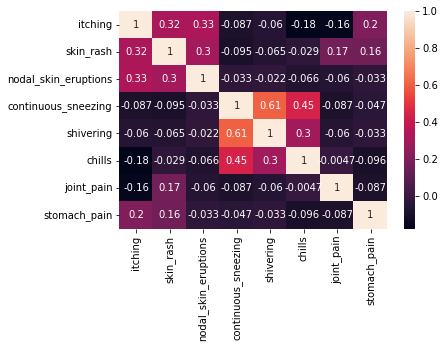

In [ ]:
sns.heatmap(data.iloc[:, 0:8].corr(),annot=True)
plt.show()

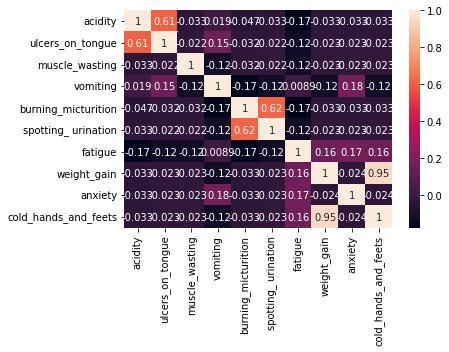

In [ ]:
sns.heatmap(data.iloc[:, 8:18].corr(),annot=True)
plt.show()

In [ ]:
X = data.drop(['prognosis'], axis=1)
y = data['prognosis'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3444, 132)
(3444,)
(1476, 132)
(1476,)


<H3>KNN</H3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score,classification_report

#,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [ ]:
neigh = KNeighborsClassifier()
params ={'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

clf = RandomizedSearchCV(neigh, params, cv=folds, scoring='accuracy', n_iter=10, random_state=5)
search = clf.fit(X_train,y_train)
best_k=search.best_params_['n_neighbors'] 
print(best_k)

13


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=13)

In [ ]:
neigh.score(X_train,y_train) 

1.0

In [ ]:
neigh.score(X_test,y_test) 

1.0

In [ ]:
ytrain_predict_probknn=neigh.predict_proba(X_train)
ytest_predict_probknn=neigh.predict_proba(X_test) 

In [ ]:
ytrain_predict_knn=neigh.predict(X_train)
ytest_predict_knn=neigh.predict(X_test) 

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_probknn,multi_class='ovr')
print("Train AUC:",train_auc) 

Train AUC: 1.0


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_probknn,multi_class='ovr') 
print("Test AUC:",test_auc) 

Test AUC: 1.0


In [ ]:
print(classification_report(y_test, ytest_predict_knn)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        43
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        39
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        35
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        35
                           

<h3>Decision Tree</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
ytrain_predict_probdt=dtree.predict_proba(X_train)
ytest_predict_probdt=dtree.predict_proba(X_test)

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_probdt,multi_class='ovr')
print("Train AUC:",train_auc) 

Train AUC: 1.0


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_probdt,multi_class='ovr')
print("Test AUC:",test_auc) 

Test AUC: 1.0


In [ ]:
ytrain_predict_dt=dtree.predict(X_train)
ytest_predict_dt=dtree.predict(X_test) 

In [ ]:
dtree.score(X_train,y_train)
dtree.score(X_test,y_test) 

1.0

In [ ]:
print(classification_report(y_test, ytest_predict_dt)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        43
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        39
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        35
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        35
                           

<h3> RandomForest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 

RandomForestClassifier()

In [ ]:
ytrain_predict_probrf=rf.predict_proba(X_train)
ytest_predict_probrf=rf.predict_proba(X_test)

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_probrf,multi_class='ovr')
print("Train AUC:",train_auc) 

Train AUC: 1.0


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_probrf,multi_class='ovr')
print("Test AUC:",test_auc) 

Test AUC: 1.0


In [ ]:
ytrain_predict_rf=rf.predict(X_train)
ytest_predict_rf=rf.predict(X_test) 

In [ ]:
rf.score(X_train,y_train)
rf.score(X_test,y_test) 

1.0

In [ ]:
print(classification_report(y_test, ytest_predict_rf)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        43
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        39
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        35
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        35
                           

<h3> GradientBoosting </h3>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradientclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
ytrain_predict_probgb=gradientclass.predict_proba(X_train)
ytest_predict_probgb=gradientclass.predict_proba(X_test) 

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_probgb,multi_class='ovr')
print("Train AUC:",train_auc) 

Train AUC: 0.48896891338601567


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_probgb,multi_class='ovr')
print("Test AUC:",test_auc) 

Test AUC: 0.48801191826233714


In [ ]:
ytrain_predict_gradientclass=gradientclass.predict(X_train)
ytest_predict_gradientclass=gradientclass.predict(X_test) 

In [ ]:
gradientclass.score(X_train,y_train)
gradientclass.score(X_test,y_test) 

0.0006775067750677507

In [ ]:
print(classification_report(y_test, ytest_predict_gradientclass)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00        43
                                   AIDS       0.00      0.00      0.00        31
                                   Acne       0.00      0.00      0.00        39
                    Alcoholic hepatitis       0.00      0.00      0.00        29
                                Allergy       0.00      0.00      0.00        40
                              Arthritis       0.00      0.00      0.00        35
                       Bronchial Asthma       0.00      0.00      0.00        33
                   Cervical spondylosis       0.00      0.00      0.00        34
                            Chicken pox       0.00      0.00      0.00        32
                    Chronic cholestasis       0.00      0.00      0.00        31
                            Common Cold       0.00      0.00      0.00        35
                           

<H3> LogisticRegression </h3>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model = model.fit(X_train, y_train) 

In [ ]:
ytrain_predict_problr=model.predict_proba(X_train)
ytest_predict_problr=model.predict_proba(X_test)

In [ ]:
train_auc = roc_auc_score(y_train, ytrain_predict_problr,multi_class='ovr')
print("Train AUC:",train_auc)  

Train AUC: 1.0


In [ ]:
test_auc = roc_auc_score(y_test, ytest_predict_problr,multi_class='ovr')
print("Test AUC:",test_auc) 

Test AUC: 1.0


In [ ]:
ytrain_predict_model=model.predict(X_train)
ytest_predict_model=model.predict(X_test) 

In [ ]:
model.score(X_train,y_train)
model.score(X_test,y_test) 

1.0

In [ ]:
print(classification_report(y_test, ytest_predict_model)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        43
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        39
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        35
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        35
                           